# IRIS flower

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('IRIS.csv')

In [115]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [117]:
df = df.drop_duplicates()

In [118]:
df.shape

(147, 5)

In [119]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [120]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [121]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

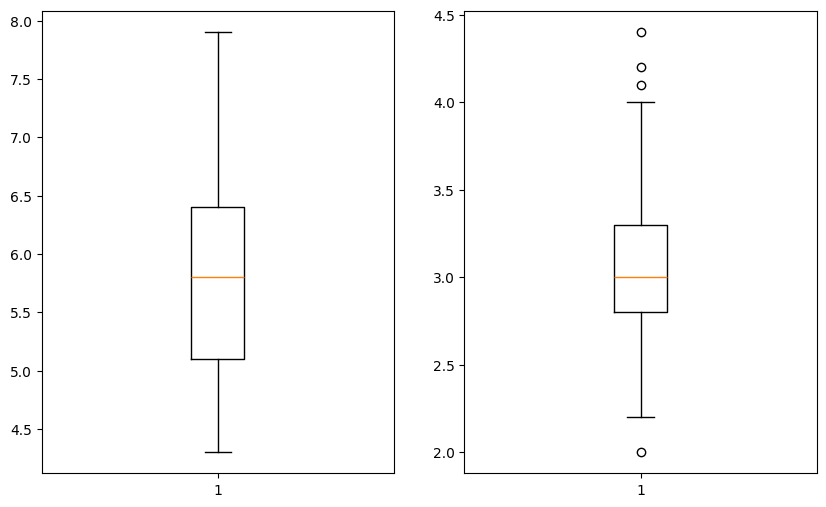

In [122]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(df['sepal_length'])

plt.subplot(1,2,2)
plt.boxplot(df['sepal_width'])
plt.show()

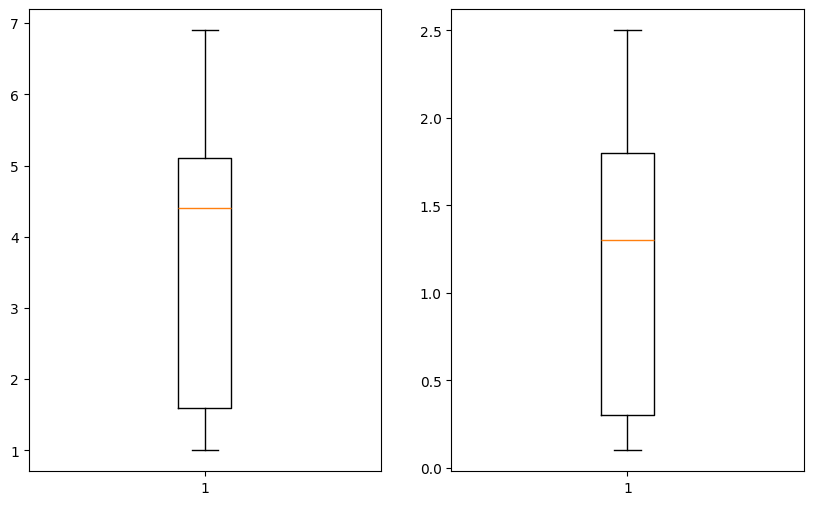

In [123]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(df['petal_length'])

plt.subplot(1,2,2)
plt.boxplot(df['petal_width'])
plt.show()

In [124]:
higher = df['sepal_width'].mean() + 3 * df['sepal_width'].std()

In [125]:
lower = df['sepal_width'].mean() - 3 * df['sepal_width'].std()

In [126]:
print(higher,'\t',lower)

4.366808433335477 	 1.7447561925148636


In [127]:
df = df[(df['sepal_width'] < higher) | (df['sepal_width'] > lower)]

In [128]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
df.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

In [130]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,2
24,4.8,3.4,1.9,0.2,0
127,6.1,3.0,4.9,1.8,2
112,6.8,3.0,5.5,2.1,2
27,5.2,3.5,1.5,0.2,0


<Axes: >

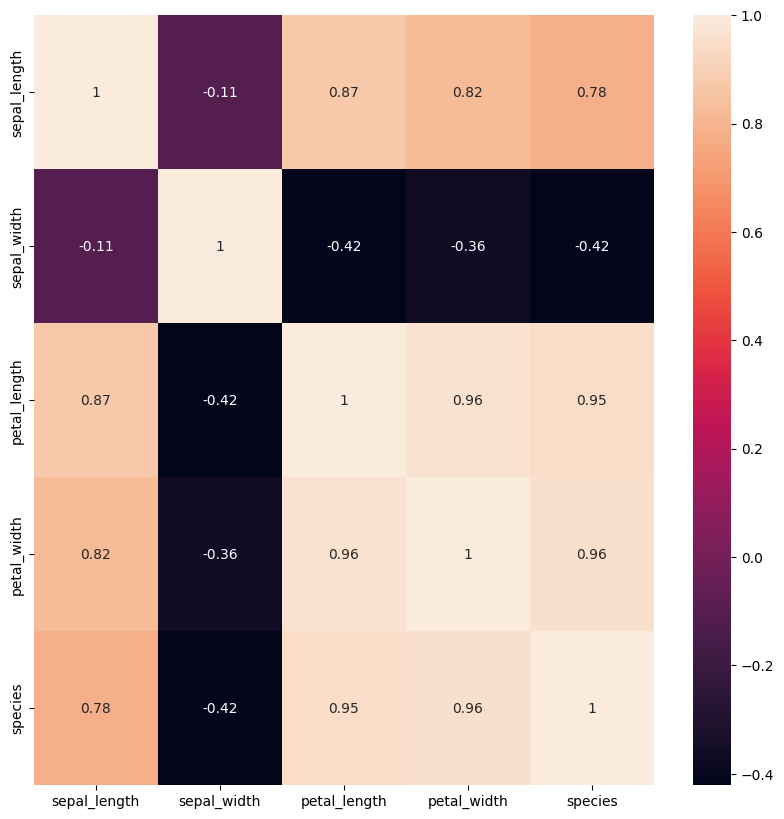

In [131]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [132]:
x=df.drop(columns='species')
y=df['species']

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [135]:
model = LogisticRegression()

In [136]:
model.fit(x_train,y_train)

LogisticRegression()

In [137]:
model.score(x_train,y_train)

0.9829059829059829

In [138]:
model.score(x_test,y_test)

0.9666666666666667